In [ ]:
! pip install -q kaggle

from google.colab import files
files.upload()

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

In [ ]:
!kaggle datasets download -d puneet6060/intel-image-classification

In [ ]:
!unzip /content/intel-image-classification.zip

In [4]:
import cv2
import os
import matplotlib.pyplot as plt
from keras import Sequential
from tensorflow.keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, Dropout, MaxPool2D, Flatten

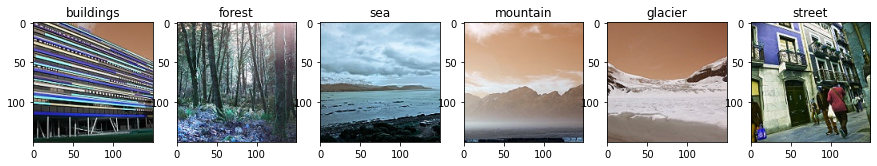

In [5]:
w = 10
h = 10
fig = plt.figure(figsize=(15,10))
columns = 6
rows = 1
fielName = "/content/seg_train/seg_train"

for i in range(0, columns*rows ):
  folderName = os.path.join((fielName), os.listdir(fielName)[i])
  img = cv2.imread(folderName+'/'+(os.listdir(os.path.join((fielName), os.listdir(fielName)[i]))[i]))
  fig.add_subplot(rows, columns, i+1)
  plt.imshow(img)
  plt.title(os.path.basename(folderName))

plt.show()

In [6]:
batch_size = 32
resize = (224, 224)

train_datagen = ImageDataGenerator(
        rescale=1./255,
        featurewise_std_normalization=True) 

validation_datagen = ImageDataGenerator(
        rescale=1./255,
        featurewise_std_normalization=True)

train_generator = train_datagen.flow_from_directory(
        '/content/seg_train/seg_train', 
        target_size=resize, 
        batch_size=batch_size,
        class_mode='categorical')  

validation_generator = validation_datagen.flow_from_directory(
        '/content/seg_test/seg_test',
        target_size=resize,
        batch_size=batch_size,
        class_mode='categorical')

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:349: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [15]:
%pip install wandb -q
import wandb
from wandb.keras import WandbCallback
from keras.callbacks import LambdaCallback


In [ ]:
!wandb login
wandb.init(project="vgg", entity="manar")

In [17]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=(224,224,3), activation="relu", padding="same"))
model.add(Conv2D(64, (3,3), activation="relu", padding="same"))
model.add(MaxPool2D((2,2), (2,2)))
model.add(Conv2D(128, (3,3), activation="relu", padding="same"))
model.add(Conv2D(128, (3,3), activation="relu", padding="same"))
model.add(MaxPool2D((2,2), (2,2)))
model.add(Conv2D(256, (3,3), activation="relu", padding="same"))
model.add(Conv2D(256, (3,3), activation="relu", padding="same"))
model.add(MaxPool2D((2,2), (2,2)))
model.add(Conv2D(512, (3,3), activation="relu", padding="same"))
model.add(Conv2D(512, (3,3), activation="relu", padding="same"))
model.add(MaxPool2D((2,2), (2,2)))
model.add(Conv2D(512, (3,3), activation="relu", padding="same"))
model.add(Conv2D(512, (3,3), activation="relu", padding="same"))
model.add(MaxPool2D((2,2), (2,2)))
model.add(Flatten())
model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(4096, activation="relu"))
model.add(Dense(6, activation="softmax"))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 56, 56, 256)      

In [19]:
opt = optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.fit(train_generator, validation_data=validation_generator, epochs=10, callbacks=[WandbCallback()])